CATEGORIZATIONS BY NEGATIVE AND NEUTRAL SENTIMENTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import torch
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Descargar recursos de NLTK 
nltk.download('punkt')
nltk.download('wordnet')

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Cargar el modelo BERT
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Leer el archivo Excel
file_path = 'C:/Users/joey_/Desktop/DB TP-STRIPE (RESPALDOS)/Comments - copia.xlsx'
df = pd.read_excel(file_path)

# 1. Análisis de sentimiento
def analyze_sentiment(comment):
    comment = str(comment).strip()
    if not comment or comment == "nan":
        return "NEUTRAL", 0.0
    result = sentiment_analyzer(comment, truncation=True, max_length=512)[0]
    label = result['label']
    score = result['score']
    if label == "POSITIVE":
        polarity = score
        sentiment = "Positive" if score > 0.7 else "Neutral"
    else:
        polarity = -score
        sentiment = "Negative" if score > 0.7 else "Neutral"
    return sentiment, polarity

df[['sentiment', 'polarity']] = df["TRANSLATED COMMENTS"].apply(analyze_sentiment).apply(pd.Series)

print("Distribución de sentimientos:")
print(df['sentiment'].value_counts())

df_nn = df[df['sentiment'].isin(['Negative', 'Neutral'])].copy()
comments_nn = df_nn["TRANSLATED COMMENTS"].tolist()
print(f"\nNúmero de comentarios Negativos y Neutrales: {len(comments_nn)}")

print("\nEjemplos de comentarios con puntajes:")
print(df[["TRANSLATED COMMENTS", 'sentiment', 'polarity']].head(10))

# 2. Listado predefinido de issues (en forma base)
predefined_issues = {
    "Slow Response/Delay Issues": ["faster","feedback","slow", "answer", "solution" , "wait", "long", "wait", "late", "take", "forever", "reply", "frustrate"],
    "Poor Agent Knowledge": ["know", "prepare", "confuse", "wrong", "incompetent", "expert"],
    "Poor Support Quality": ["rude", "help", "attitude", "confuse", "incompetent", "understand", "agent"],
    "Fraud/Trust Issues": ["fraud", "scam", "trust", "secure", "money", "pay", "fake", "hack", "safe"],
    "Product and Services": ["account", "service", "term", "policy", "product", "avail", "refund"],
    "Platform Functionality": ["app","api","platform", "system", "error", "bug", "crash", "technical", "happen"],
    "Lack of Communication Channels": ["phone", "email", "contact", "call", "chat", "verbal","operator","agent"],
    "Lack of Response": ["assistance","receive","any","request", "support" ,"contact","respond", "answer", "no one", "get", "feedback", "question", "nobody", "silent","call"],
    "Ineffective Resolution": ["unsuccessful","request","resolve", "problem", "solve", "fix", "nothing", "resolution"],
    "Language Barriers": ["portuguese", "help", "speaker", "native", "spanish", "english", "language", "italian", "translate", "speak"]
}


# Función para lematizar un texto
def lemmatize_text(text):
    words = word_tokenize(text.lower())
    lemmatized_words = {lemmatizer.lemmatize(word) for word in words}
    return lemmatized_words

# Función para asignar issue a un comentario individual
def assign_issue(comment):
    comment_words = lemmatize_text(comment)
    max_overlap = 0
    best_issue = "Other Issues"
    for issue, issue_keywords in predefined_issues.items():
        overlap = len(comment_words.intersection(set(issue_keywords)))
        if overlap > max_overlap or (overlap == max_overlap and issue in ["Lack of Response", "Language Barriers", "Platform Functionality", "Poor Support Quality", "Poor Agent Knowledge", "Product and Services", "Fraud/Trust Issues", "Lack of Communication Channels"]):
            max_overlap = overlap
            best_issue = issue
    return best_issue if max_overlap > 0 else "Other Issues"

# Asignar issues directamente a cada comentario
df_nn['issue'] = df_nn["TRANSLATED COMMENTS"].apply(assign_issue)

# 3. Validación
print("\nComentarios con sus issues asignados:")
print(df_nn[["TRANSLATED COMMENTS", 'sentiment', 'polarity', 'issue']])

# 4. Visualización de frecuencias
plt.figure(figsize=(12, 6))
issue_counts = df_nn['issue'].value_counts()
sns.barplot(x=issue_counts.values, y=issue_counts.index, palette = "viridis",hue=issue_counts.index)
plt.xlabel('Frecuencia', size=14)
plt.ylabel('Topics/Issues', size=14)
plt.title('Frequency of Topics related to SurveyComments (Negatives Comments)', size=16)
for i, v in enumerate(issue_counts.values):
    plt.text(v, i, str(v), va='center',size=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
operator torchvision::nms does not exist

In [37]:
df_nn.head(25)

,TRANSLATED COMMENTS,sentiment,polarity,issue
2,...I didn't even get a response!,Negative,-0.999758,Lack of Response
3,2 weeks and no resolution yet,Negative,-0.998362,Ineffective Resolution
7,above-average and customer-unfriendly waiting ...,Negative,-0.999778,Lack of Response
10,After a few days I found out on my own how to ...,Negative,-0.999192,Ineffective Resolution
20,"Answers take far too long, even for urgent pro...",Negative,-0.999647,Slow Response/Delay Issues
21,Apart from receiving emails saying we are proc...,Negative,-0.999522,Lack of Response
23,assistance on missed collections.,Negative,-0.985095,Lack of Response
24,At first it seemed like he didn't understand w...,Negative,-0.996610,Lack of Communication Channels
25,bad,Negative,-0.999782,Other Issues
26,Basically a nice chat but the answer was compl...,Negative,-0.997492,Fraud/Trust Issues


SOLO NEGATIVOS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joey_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joey_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Device set to use cpu


Distribución de sentimientos:
sentiment
Negative    247
Positive    179
Neutral      16
Name: count, dtype: int64

Número de comentarios Negativos: 247

Ejemplos de comentarios con puntajes:
                                 TRANSLATED COMMENTS sentiment  polarity
0                                                ...  Positive  0.958502
1                      ...but your reply was good :)  Positive  0.994082
2                   ...I didn't even get a response!  Negative -0.999758
3                      2 weeks and no resolution yet  Negative -0.998362
4               A little late but perfect in the end  Positive  0.999673
5                     A wonderful support. Thank you  Positive  0.999871
6  Above all, I have the impression that it was a...  Positive  0.919808
7  above-average and customer-unfriendly waiting ...  Negative -0.999778
8          Accurate Fast Perfect Thank you very much  Positive  0.999876
9         Accurate information, thank you very much!  Positive  0.999876

Comen

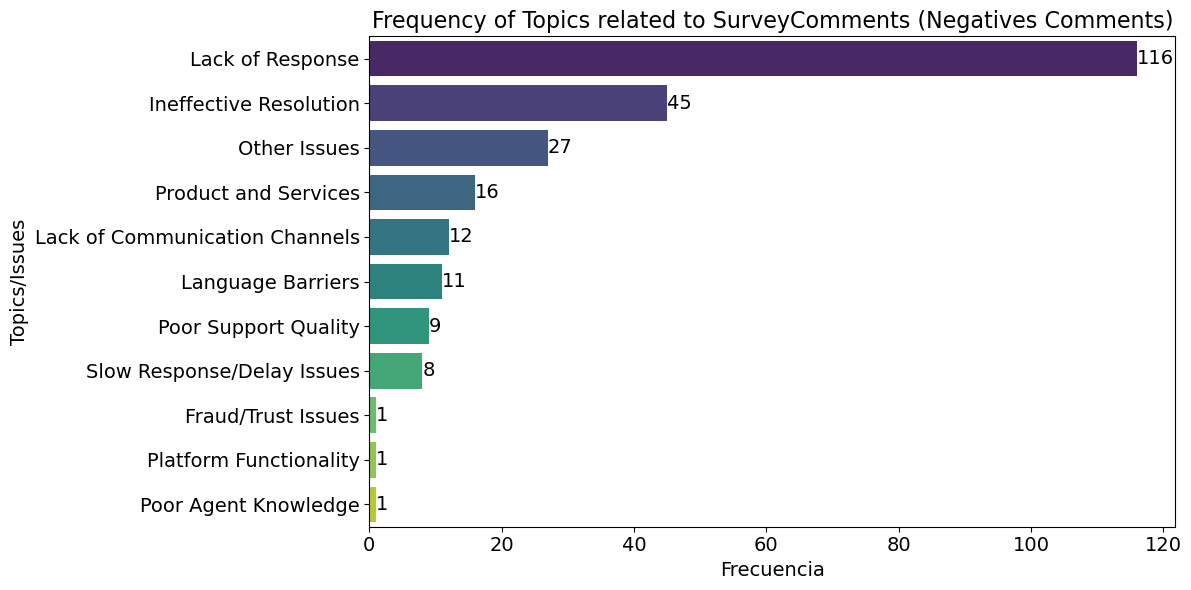

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import torch
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Descargar recursos de NLTK (solo la primera vez)
nltk.download('punkt')
nltk.download('wordnet')

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Cargar el modelo BERT
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Leer el archivo Excel
file_path = 'C:/Users/joey_/Desktop/DB TP-STRIPE (RESPALDOS)/Comments.xlsx'
df = pd.read_excel(file_path)

# 1. Análisis de sentimiento
def analyze_sentiment(comment):
    comment = str(comment).strip()
    if not comment or comment == "nan":
        return "NEUTRAL", 0.0
    result = sentiment_analyzer(comment, truncation=True, max_length=1000)[0]
    label = result['label']
    score = result['score']
    if label == "POSITIVE":
        polarity = score
        sentiment = "Positive" if score > 0.8 else "Neutral"
    else:
        polarity = -score
        sentiment = "Negative" if score > 0.8 else "Neutral"
    return sentiment, polarity

df[['sentiment', 'polarity']] = df["TRANSLATED COMMENTS"].apply(analyze_sentiment).apply(pd.Series)

print("Distribución de sentimientos:")
print(df['sentiment'].value_counts())

# Filtrar solo comentarios Negativos
df_nn = df[df['sentiment'] == 'Negative'].copy()
comments_nn = df_nn["TRANSLATED COMMENTS"].tolist()
print(f"\nNúmero de comentarios Negativos: {len(comments_nn)}")

print("\nEjemplos de comentarios con puntajes:")
print(df[["TRANSLATED COMMENTS", 'sentiment', 'polarity']].head(10))

# 2. Listado predefinido de issues (en forma base)
predefined_issues = {
    "Slow Response/Delay Issues": ["spend","urgent","faster","feedback","slow", "answer", "solution" , "wait", "long", "wait", "late", "take", "forever", "reply", "frustrate", "too"],
    "Poor Agent Knowledge": ["staff","agent","unclear","unqualified","know", "prepare", "confuse", "wrong", "incompetent", "expert", "clarity"],
    "Poor Support Quality": ["clearly", "clarify","explanation","rude", "help", "attitude", "confuse", "incompetent", "understand", "agent","not"],
    "Fraud/Trust Issues": ["fraud", "scam", "trust", "secure", "money", "pay", "fake", "hack", "safe"],
    "Product and Services": ["disagree","give","money","card","billing","invoice","commission","account", "service", "term", "policy", "product", "avail", "refund"],
    "Platform Functionality": ["app","api","platform", "system", "error", "bug", "crash", "technical", "happen"],
    "Lack of Communication Channels": ["telephone","phone", "email", "contact", "call", "chat", "verbal","operator","agent"],
    "Lack of Response": ["not","still","waiting","assistance","receive","any","request", "support" ,"contact","respond", "answer", "no one", "get", "feedback", "question", "nobody", "silent","call", "response"],
    "Ineffective Resolution": ["not","unsuccessful","request","resolve", "problem", "solve", "fix", "nothing", "resolution", "solved"],
    "Language Barriers": ["portuguese", "help", "speaker", "native", "spanish", "english", "language", "italian", "translate", "speak"]
}

# Función para lematizar un texto
def lemmatize_text(text):
    words = word_tokenize(text.lower())
    lemmatized_words = {lemmatizer.lemmatize(word) for word in words}
    return lemmatized_words

# Función para asignar issue a un comentario individual
def assign_issue(comment):
    comment_words = lemmatize_text(comment)
    max_overlap = 0
    best_issue = "Other Issues"
    for issue, issue_keywords in predefined_issues.items():
        overlap = len(comment_words.intersection(set(issue_keywords)))
        if overlap > max_overlap or (overlap == max_overlap and issue in ["Lack of Response", "Language Barriers", "Platform Functionality", "Poor Support Quality", "Poor Agent Knowledge", "Product and Services", "Fraud/Trust Issues", "Lack of Communication Channels"]):
            max_overlap = overlap
            best_issue = issue
    return best_issue if max_overlap > 0 else "Other Issues"

# Asignar issues directamente a cada comentario
df_nn['issue'] = df_nn["TRANSLATED COMMENTS"].apply(assign_issue)
df_nn['Start of Week'] = pd.to_datetime(df_nn['Start of Week'])

# 3. Validación
print("\nComentarios Negativos con sus issues asignados:")
print(df_nn[["TRANSLATED COMMENTS", 'sentiment', 'polarity', 'issue']])

# 4. Visualización de frecuencias
plt.figure(figsize=(12, 6))
issue_counts = df_nn['issue'].value_counts()
sns.barplot(x=issue_counts.values, y=issue_counts.index, palette = "viridis",hue=issue_counts.index)
plt.xlabel('Frecuencia', size=14)
plt.ylabel('Topics/Issues', size=14)
plt.title('Frequency of Topics related to SurveyComments (Negatives Comments)', size=16)
for i, v in enumerate(issue_counts.values):
    plt.text(v, i, str(v), va='center',size=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

In [37]:
filtrando = df_nn[df_nn["issue"]== "Lack of Response"]
filtrando

,TRANSLATED COMMENTS,Case ID,WEEK,Start of Week,sentiment,polarity,issue
2,...I didn't even get a response!,5008W000010MvhPQAS,3,2023-01-15,Negative,-0.999758,Lack of Response
7,above-average and customer-unfriendly waiting ...,5008W000018z0XdQAI,33,2023-08-13,Negative,-0.999778,Lack of Response
10,After a few days I found out on my own how to ...,5008W000014QdF2QAK,14,2023-04-02,Negative,-0.999192,Lack of Response
21,Apart from receiving emails saying we are proc...,5008W000015XZzXQAW,20,2023-05-14,Negative,-0.999522,Lack of Response
23,assistance on missed collections.,5008W000011BbcvQAC,6,2023-02-05,Negative,-0.985095,Lack of Response
...,...,...,...,...,...,...,...
424,Word Press says I already have my website conn...,5008W00001FcRzKQAV,46,2023-11-12,Negative,-0.999807,Lack of Response
427,"Yes, I would like you to support me and explai...",5008W000013SOCSQA4,13,2023-03-26,Negative,-0.999161,Lack of Response
428,"Yes, provide visual verification such as scree...",5008W000015VsL2QAK,19,2023-05-07,Negative,-0.999580,Lack of Response
431,You didn't answer my question,5008W00001Eux4UQAR,44,2023-10-29,Negative,-0.999706,Lack of Response


In [38]:
df_nn.to_excel('C:/Users/joey_/Desktop/DB TP-STRIPE (RESPALDOS)/Sentiments and Topics.xlsx', index=False)

In [2]:
pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
adjustText                        1.3.0
aext-assistant                    4.0.35
aext-assistant-server             4.0.35
aext-core                         4.0.35
aext-core-server                  4.0.35
aext-panels                       4.0.35
aext-panels-server                4.0.35
aext-share-notebook               4.0.35
aext-share-notebook-server        4.0.35
aext-shared                       4.0.35
aext-toolbox                      4.0.35
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
altgraph                          0.17.4
anaconda-anon-usage               0.4.4
anaconda-c